<a href="https://colab.research.google.com/github/dipanshuhaldar/keras_implementations-/blob/master/lenet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementation of LeNet5 in Keras with Mnist dataset

**This code implementation is in line with** 
[LeCun et al., 1998. Gradient based learning applied to document recognition]

**Some minor changes are made to the original architecture** 
*   ReLU activation instead of sigmoid/tanh
*   max pooling instead of avg pooling
*   softmax output layer instead of sigmoid/tanh

In [0]:
#Import all dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [0]:
#Set batch_size, number_classes, epochs, num_channels
batch_size = 128
num_classes = 10 
epochs = 12
num_channels = 1

In [0]:
#Train test data split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
#Image input dimensions
img_rows, img_cols = X_train.shape[1], X_train.shape[2]

In [0]:
#if we are using channels first, update the input shape
if K.image_data_format() == 'channels_first':
  X_train = X_train.reshape(X_train.shape[0], num_channels, img_rows, img_cols)
  X_test = X_test.reshape(X_test.shape[0], num_channels, img_rows, img_cols)
  input_shape = (num_channels, img_rows, img_cols)
else:
  X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, num_channels)
  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, num_channels)
  input_shape = (img_rows, img_cols, num_channels)

In [0]:
##Data Preparation
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print('Training Data Shape: ',X_train.shape)
print('Total Number of training samples: ',X_train.shape[0])
print('Total Number of test samples: ',X_test.shape[0])

Training Data Shape:  (60000, 28, 28, 1)
Total Number of training samples:  60000
Total Number of test samples:  10000


In [0]:
#Convert the Labels to binary Class Matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

Model Building

In [0]:
lenet = Sequential()

#define 1st CONV => ACTIVATION => POOL layers

#########################
#CONV2D layer runs total 32 convolution filters of size(3, 3) and Activation Function to be used is ReLu
lenet.add(Conv2D(32, kernel_size= (3, 3), activation = 'relu', input_shape = input_shape))
#MaxPooling window size is (2, 2) with a sliding window size of (2, 2)
lenet.add(MaxPooling2D(pool_size = (2, 2)))
#########################

#define 2nd CONV => ACTIVATION => Pool layers

#########################
#CONV2D layer runs total 64 convolution filters of size(3, 3) and Activation Function to be used is ReLu
lenet.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
#MaxPooling window size is (2, 2) with a sliding window size of (2, 2)
lenet.add(MaxPooling2D(pool_size=(2, 2)))
#Dropout introduced 25%
lenet.add(Dropout(0.25))
#########################

#define 1st FC => ACTIVATION layers

#########################
#we take the output of the previous MaxPooling2D layer and flatten 
#   it into a single vector so that we can apply Dense layers

lenet.add(Flatten())
#Dense layer contains 128 nodes and Activation Function to be used is ReLu
lenet.add(Dense(128, activation = 'relu'))
#Dropout introduced 25%
lenet.add(Dropout(0.5))
#########################

#define 2nd FC layer accepting the number of classes

#########################
lenet.add(Dense(num_classes, activation = 'softmax'))
#########################

Model Compilation

In [0]:
#Model Evaluation Metrics

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [0]:
#Compile model
lenet.compile(optimizer = keras.optimizers.Adadelta(), loss = 'categorical_crossentropy',  
              metrics = ['accuracy',f1_m, precision_m, recall_m])

Model Training

Train on 42000 samples, validate on 18000 samples
Epoch 1/12
42000/42000 [==============================] - 2s 53us/step - loss: 0.3935 - accuracy: 0.8760 - f1_m: 0.8571 - precision_m: 0.9051 - recall_m: 0.8315 - val_loss: 0.0935 - val_accuracy: 0.9717 - val_f1_m: 0.9719 - val_precision_m: 0.9771 - val_recall_m: 0.9668
Epoch 2/12
42000/42000 [==============================] - 2s 48us/step - loss: 0.1251 - accuracy: 0.9618 - f1_m: 0.9625 - precision_m: 0.9694 - recall_m: 0.9558 - val_loss: 0.0795 - val_accuracy: 0.9754 - val_f1_m: 0.9758 - val_precision_m: 0.9787 - val_recall_m: 0.9729
Epoch 3/12
42000/42000 [==============================] - 2s 48us/step - loss: 0.0932 - accuracy: 0.9716 - f1_m: 0.9718 - precision_m: 0.9758 - recall_m: 0.9678 - val_loss: 0.0540 - val_accuracy: 0.9833 - val_f1_m: 0.9836 - val_precision_m: 0.9854 - val_recall_m: 0.9818
Epoch 4/12
42000/42000 [==============================] - 2s 49us/step - loss: 0.0766 - accuracy: 0.9768 - f1_m: 0.9769 - precision_m: 0.

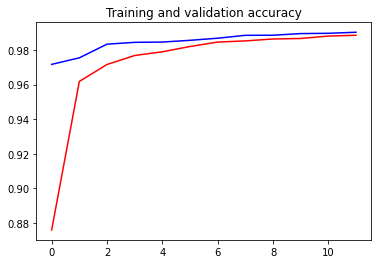

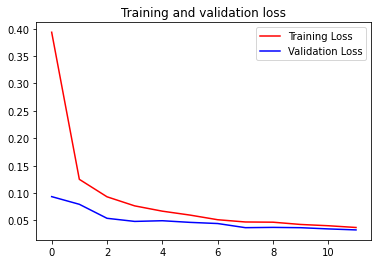

In [0]:
#Early Stopping
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience = 3)

#Train Model
history = lenet.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, 
          validation_split=0.3,  callbacks = [early_stopping_monitor])

#Accuracy and Loss change per epoch

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Make Predictions

In [0]:
#Evaluate the model
loss, accuracy, f1_score, precision, recall = lenet.evaluate(X_test, y_test, verbose=0)

#Model evaluation Metrics
pd.DataFrame({'Loss': [loss],
              'Accuracy': [accuracy],
              'f1_score': [f1_score],
              'Precision': [precision],
              'Recall': [recall]
              })

,Loss,Accuracy,f1_score,Precision,Recall
0,0.024207,0.9917,0.991537,0.992286,0.990815
